# Halloween Exploratory Data Analysis #

by Will Talbot

As I am giving out candy on Halloween  with the Simpson's Treehouse of Terror on TV in the background, I saw a dataset on Halloween Candy on Kaggle and decided to conduct a brief exploratory analysis of it. I am interested to see what factors make candy popular.

*Sidenote:* my favorite Halloween candy is candycorn, which I think is delicous, but I will put my bias aside.

I obtained the dataset from Kaggle, which got the data from FiveThirtyEight. Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license. https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking


I am interested to see if the number of 'key' ingredients, the combination of these key ingredients, and candy form (the form the candy is in, such as hard, bar, or bagged), effects how popular a candy is. 'Popular' can be defined by how often a candy is selected in the matchups, which will be denotated as winning percentage. 

This data was collected from 269,000 candy match ups, which involved 83 different candies and two non-candies (two forms of coin money), from 8,371 users.  

The columns can be described as the following: 

**Chocolate:** The Candy contains chocolate (1 = Yes, 0 = No)

**Fruity:** The candy contains a fruity material (1 = Yes, 0 = No)

**Caramel:** The candy contains carmel (1 = Yes, 0 = No)

**Peanutalmondy:** The candy contains peanuts, peanut butter or almonds (1 = Yes, 0 = No)

**Nougat:** The candy contain nougat (1 = Yes, 0 = No)

**Crispedricewafer:** The candy contains a crisped rice, wafers, or a cookie component (1 = Yes, 0 = No)

**Hard:** The candy is a hard candy (1 = Yes, 0 = No)

**Bar:** The candy is a candy bar (1 = Yes, 0 = No)

**Pluribus:** The candy comes in many small pieces a in a bag or box (1 = Yes, 0 = No)

**Sugarpercent:** The sugar portion content of each candy

**Pricepercent:** The unit price percentile compared to the rest of the set

**Winpercent:** The overall win percentage according to 269,000 matchups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.stats import pearsonr

In [2]:
# Import the data
df = pd.read_csv('data/candy-data.csv')

In [3]:
# preview the data
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
# Drop the non-candies One dime and One quarter - who else disliked houses that gave out coins?
df = df.drop(df.index[[2,3]])

In [5]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547


In [6]:
df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [7]:
# The number of candies in the dataframe
len(df['competitorname'])

83

## Data Cleaning/Data Manipulation ##

After observing the data, I noticed it will be beneficial to add some columns to provide more specificity better for analyis of the data.

1) **'number_ingredients':** A column of how many 'key' ingredients each candy has. Key ingredients include Chocolate, Fruity, Caramel, Peanuty & Almondy, Nougat, and Crispedrice.

2) **'combo':** A column describing what the key ingredients are separated by '/'

3) **'form':** A column indicating if each candy comes in Hard, Bag, Bar,  Hard/Bag, or other form

4) **'other':** The candy is in a form other than bar, hard, or bag (1 = Yes, 0 = No)

In [8]:
# Fix the O error in the competitiorname
df['competitorname'] = df['competitorname'].str.replace('Õ','\'')

In [9]:
df['pricepercent'] = df['pricepercent'] * 100
df['sugarpercent'] = df['sugarpercent'] * 100

In [10]:
# Create new columns that ranks the winpercent, pricepercent and sugarpercent
df['popularity_rank'] = df['winpercent'].rank(ascending = False)
df['price_rank'] = df['pricepercent'].rank(ascending = False)
df['sugar_rank'] = df['sugarpercent'].rank(ascending = False)

In [11]:
# Create a new column that counts up the 'key ingredient'
df['number_ingredients'] = df['chocolate'] + df['fruity'] + df['caramel'] + df['peanutyalmondy'] + df['crispedricewafer'] + df['nougat']

In [12]:
# Create function that combines these ingridents
def ingredients(a, b, c, d, e, f):
    if a == 1 and b == 0 and c == 0 and d == 0 and e == 0 and f == 0:
        return str('Chocolate')
    elif a == 0 and b == 1 and c == 0 and d == 0 and e == 0 and f == 0:
        return str('Fruity')
    elif a == 0 and b == 0 and c == 1 and d == 0 and e == 0 and f == 0:
        return str('Caramel')
    elif a == 0 and b == 0 and c == 0 and d == 1 and e == 0 and f == 0:
        return str('Peanuty & Almondy')
    elif a == 0 and b == 0 and c == 0 and d == 0 and e == 1 and f == 0:
        return str('Nougat')
    elif a == 1 and b == 1 and c == 0 and d == 0 and e == 0 and f == 0:
        return str('Chocolate/Fruity')
    elif a == 1 and b == 1 and c == 1 and d == 0 and e == 0 and f == 0:
        return str('Chocolate/Fruity/Caramel')
    elif a == 0 and b == 1 and c == 1 and d == 1 and e == 1 and f == 0:
        return str('Fruity/Caramel/Peanuty & Almondy/Nougat')
    elif a == 1 and b == 0 and c == 1 and d == 1 and e == 1 and f == 0:
        return str('Chocolate/Caramel/Peanuty & Almondy/Nougat')
    elif a == 1 and b == 0 and c == 1 and d == 1 and e == 0 and f == 0:
        return str('Chocolate/Caramel/Peanuty & Almondy')
    elif a == 1 and b == 1 and c == 0 and d == 1 and e == 1 and f == 0:
        return str('Chocolate/Fruity/Peanuty & Almondy/Nougat')
    elif a == 1 and b == 1 and c == 1 and d == 0 and e == 1 and f == 0:
        return str('Chocolate/Fruity/Caramel/Nougat')
    elif a == 1 and b == 0 and c == 1 and d == 0 and e == 1 and f == 0:
        return str('Chocolate/Caramel/Nougat')
    elif a == 1 and b == 0 and c == 0 and d == 0 and e == 1 and f == 0:
        return str('Chocolate/Nougat')
    elif a == 1 and b == 0 and c == 1 and d == 0 and e == 0 and f == 0:
        return str('Chocolate/Caramel')
    elif a == 1 and b == 0 and c == 0 and d == 1 and e == 0 and f == 0:
        return str('Chocolate/Peanuty & Almondy')
    elif a == 0  and b == 0 and c == 1 and d == 1 and e == 1 and f == 0:
        return str('Caramel/Peanuty & Almondy/Nougat')
    elif a == 0 and b == 0 and c == 0 and d == 1 and e == 1 and f == 0:
        return str('Peanuty & Almondy/Nougat')
    elif a == 0 and b == 1 and c == 0 and d == 0 and e == 1 and f == 0:
        return str('Fruity/Nougat')
    elif a == 0 and b == 1 and c == 1 and d == 0 and e == 0 and f == 0:
        return str('Fruity/Caramel')
    elif a == 0 and b == 1 and c == 0 and d == 0 and e == 0 and f == 1:
        return str('Crispedrice')
    elif a == 1 and b == 0 and c == 0 and d == 0 and e == 0 and f == 1:
        return str('Chocolate/Crispedrice')
    elif a == 1 and b == 0 and c == 1 and d == 0 and e == 0 and f == 1:
        return str('Chocolate/Caramel/Crispedrice')
    elif a == 1 and b == 0 and c ==1 and d == 1 and e == 0 and f == 1:
        return str('Chocolate/Caramel//Peanuty & Almondy/Crispedrice')
    else:
        return str('None')

In [13]:
# create a candy type function
def candy_form(x,y,z):
    if x == 1 and y == 0 and z == 0:
        return str('Hard')
    elif x == 0 and y == 1 and z == 0:
        return str('Bar')
    elif x == 0 and y == 0 and z ==1:
        return str('Bagged')
    elif x == 1 and y == 0 and z ==1:
        return str('Hard/Bagged')
    elif x == 0 and y == 0 and z == 0:
        return str('Other')

In [14]:
df['combo'] = np.vectorize(ingredients)(df['chocolate'], df['fruity'], df['caramel'], df['peanutyalmondy'], df['nougat'], df['crispedricewafer'])

In [15]:
df['form'] = np.vectorize(candy_form)(df['hard'], df['bar'], df['pluribus'])

In [16]:
# creates a new column 'other' for candy forms
df['other'] = df['form'].apply(lambda x: 1 if x == 'Other' else 0)

In [17]:
df['combo'] = df['combo'].astype('str')
df['form'] = df['form'].astype('str')
df['other'] = df['other'].astype('int64')

In [18]:
cols = list(df.columns.values)

In [19]:
# Rearrange the columns
df = df[['competitorname',
    'popularity_rank',
'price_rank',
 'sugar_rank',
 'form',
 'combo',
 'number_ingredients',
 'sugarpercent',
 'pricepercent',
 'winpercent',
 'chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
'other']]

In [20]:
df.head()

,competitorname,popularity_rank,price_rank,sugar_rank,form,combo,number_ingredients,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
0,100 Grand,14.0,10.5,19.5,Bar,Chocolate/Caramel/Crispedrice,3,73.199999,86.000001,66.971725,1,0,1,0,0,1,0,1,0,0
1,3 Musketeers,12.0,36.0,29.5,Bar,Chocolate/Nougat,2,60.399997,51.099998,67.602936,1,0,0,0,1,0,0,1,0,0
4,Air Heads,37.0,36.0,7.0,Other,Fruity,1,90.600002,51.099998,52.341465,0,1,0,0,0,0,0,0,0,1
5,Almond Joy,39.0,17.5,43.0,Bar,Chocolate/Peanuty & Almondy,2,46.500000,76.700002,50.347546,1,0,0,1,0,0,0,1,0,0
6,Baby Ruth,27.0,17.5,29.5,Bar,Chocolate/Caramel/Peanuty & Almondy/Nougat,4,60.399997,76.700002,56.914547,1,0,1,1,1,0,0,1,0,0


### What are the ten most and least popular candies in this study? ###

In [21]:
#top ten most popular/candies with the highest winneset percent?
df.sort_values('winpercent', ascending = False)[:10]

,competitorname,popularity_rank,price_rank,sugar_rank,form,combo,number_ingredients,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
52,Reese's Peanut Butter cup,1.0,26.0,24.0,Other,Chocolate/Peanuty & Almondy,2,72.000003,65.100002,84.180290,1,0,0,1,0,0,0,0,0,1
51,Reese's Miniatures,2.0,60.0,83.0,Other,Chocolate/Peanuty & Almondy,2,3.400000,27.900001,81.866257,1,0,0,1,0,0,0,0,0,1
79,Twix,3.0,8.0,38.5,Bar,Chocolate/Caramel/Crispedrice,3,54.600000,90.600002,81.642914,1,0,1,0,0,1,0,1,0,0
28,Kit Kat,4.0,36.0,55.5,Bar,Chocolate/Crispedrice,2,31.299999,51.099998,76.768600,1,0,0,0,0,1,0,1,0,0
64,Snickers,5.0,26.0,38.5,Bar,Chocolate/Caramel/Peanuty & Almondy/Nougat,4,54.600000,65.100002,76.673782,1,0,1,1,1,0,0,1,0,0
53,Reese's pieces,6.0,26.0,51.0,Bagged,Chocolate/Peanuty & Almondy,2,40.599999,65.100002,73.434990,1,0,0,1,0,0,0,0,1,0
36,Milky Way,7.0,26.0,29.5,Bar,Chocolate/Caramel/Nougat,3,60.399997,65.100002,73.099556,1,0,1,0,1,0,0,1,0,0
54,Reese's stuffed with pieces,8.0,26.0,1.0,Other,Chocolate/Peanuty & Almondy,2,98.799998,65.100002,72.887901,1,0,0,1,0,0,0,0,0,1
32,Peanut butter M&M's,9.0,26.0,14.5,Bagged,Chocolate/Peanuty & Almondy,2,82.499999,65.100002,71.465050,1,0,0,1,0,0,0,0,1,0
42,Nestle Butterfinger,10.0,17.5,29.5,Bar,Chocolate/Peanuty & Almondy,2,60.399997,76.700002,70.735641,1,0,0,1,0,0,0,1,0,0


In [22]:
#bottom ten most popular/candies with the highest winneset percent
df.sort_values('winpercent', ascending = False)[-10:]

,competitorname,popularity_rank,price_rank,sugar_rank,form,combo,number_ingredients,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
9,Caramel Apple Pops,74.0,52.5,29.5,Other,Fruity/Caramel,2,60.399997,32.499999,34.517681,0,1,1,0,0,0,0,0,0,1
19,Haribo Happy Cola,75.0,43.5,43.0,Bagged,None,0,46.500000,46.500000,34.158958,0,0,0,0,0,0,0,0,1,0
70,Sugar Babies,76.0,17.5,2.5,Bagged,Caramel,1,96.499997,76.700002,33.437550,0,0,1,0,0,0,0,0,1,0
71,Sugar Daddy,77.0,52.5,50.0,Other,Caramel,1,41.800001,32.499999,32.230995,0,0,1,0,0,0,0,0,0,1
57,Root Beer Barrels,78.0,78.0,19.5,Hard/Bagged,None,0,73.199999,6.900000,29.703691,0,0,0,0,0,0,1,0,1,0
26,Jawbusters,79.0,36.0,77.0,Hard/Bagged,Fruity,1,9.300000,51.099998,28.127439,0,1,0,0,0,0,1,0,1,0
72,Super Bubble,80.0,70.5,72.0,Other,Fruity,1,16.200000,11.600000,27.303865,0,1,0,0,0,0,0,0,0,1
12,Chiclets,81.0,52.5,81.5,Bagged,Fruity,1,4.600000,32.499999,24.524988,0,1,0,0,0,0,0,0,1,0
7,Boston Baked Beans,82.0,36.0,55.5,Bagged,Peanuty & Almondy,1,31.299999,51.099998,23.417824,0,0,0,1,0,0,0,0,1,0
44,Nik L Nip,83.0,1.5,68.5,Bagged,Fruity,1,19.700000,97.600001,22.445341,0,1,0,0,0,0,0,0,1,0


## Number of Key Ingredients Analysis## 

In [23]:
df_grouped = df.groupby('number_ingredients')[['competitorname']].count()
df_grouped

,competitorname
number_ingredients,
0,4
1,51
2,21
3,4
4,3


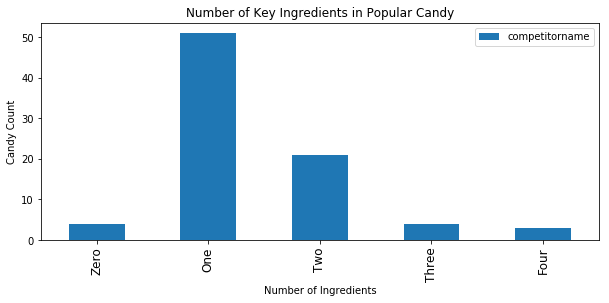

In [24]:
df_grouped.plot(kind = 'bar', title = 'Number of Key Ingredients in Popular Candy', figsize = (10,4))
plt.xticks([0, 1, 2, 3, 4], ['Zero', 'One', 'Two', 'Three', 'Four'], size = 12)
plt.xlabel('Number of Ingredients', size = 10)
plt.ylabel('Candy Count', size = 10)
plt.show();

### Most Popular Candies by Number of Key Ingredients ###

In [25]:
# Most popular candies by number of key ingredients
df.sort_values('winpercent', ascending = False).groupby('number_ingredients', as_index = False).first()

,number_ingredients,competitorname,popularity_rank,price_rank,sugar_rank,form,combo,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
0,0,Candy Corn,66.0,52.5,7.0,Bagged,None,90.600002,32.499999,38.010963,0,0,0,0,0,0,0,0,1,0
1,1,Starburst,13.0,65.0,73.0,Bagged,Fruity,15.099999,22.000000,67.037628,0,1,0,0,0,0,0,0,1,0
2,2,Reese's Peanut Butter cup,1.0,26.0,24.0,Other,Chocolate/Peanuty & Almondy,72.000003,65.100002,84.180290,1,0,0,1,0,0,0,0,0,1
3,3,Twix,3.0,8.0,38.5,Bar,Chocolate/Caramel/Crispedrice,54.600000,90.600002,81.642914,1,0,1,0,0,1,0,1,0,0
4,4,Snickers,5.0,26.0,38.5,Bar,Chocolate/Caramel/Peanuty & Almondy/Nougat,54.600000,65.100002,76.673782,1,0,1,1,1,0,0,1,0,0


**Woo-hoo!** Candy Corn is the most popular candy that has none of the key ingredients! 

In [26]:
df.groupby('number_ingredients').mean()

,popularity_rank,price_rank,sugar_rank,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
number_ingredients,,,,,,,,,,,,,,,,
0,71.750000,64.000000,36.625000,54.900000,22.050000,34.898987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,1.000000,0.000000
1,50.803922,49.313725,46.941176,43.558823,38.664706,44.663422,0.215686,0.705882,0.058824,0.019608,0.000000,0.000000,0.254902,0.078431,0.666667,0.137255
2,24.190476,26.380952,35.285714,56.590475,65.238096,62.165923,0.904762,0.095238,0.190476,0.476190,0.142857,0.190476,0.047619,0.476190,0.285714,0.190476
3,11.250000,22.875000,26.750000,65.349999,71.450001,70.628724,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.000000,1.000000,0.000000,0.000000
4,18.333333,23.166667,32.500000,58.466665,68.966669,64.372527,1.000000,0.000000,1.000000,1.000000,0.666667,0.333333,0.000000,1.000000,0.000000,0.000000


In [27]:
# The average number of key ingredients for the top 10
df.sort_values('winpercent', ascending = False)['number_ingredients'][:10].mean()

2.4

In [28]:
# The average number of key ingredients for the bottom 10
df.sort_values('winpercent', ascending = False)['number_ingredients'][-10:].mean()

0.9

In [29]:
df['number_ingredients'].mean()

1.4096385542168675

The average number of key ingredients is 1.4 with the top ten most popular candies having an average 2.4 key ingredients and the  bottom ten least popular candies having an average of 0.9 key ingredients. Whether there is a correlation between number of key ingredients and winpercent will be determined in the Statistical Analysis section below. 

## Combination of Key Ingredient Analysis ##


There are sixteen unique combinations of the key ingredients.

In [30]:
df.groupby('combo')['competitorname'].count().sort_values(ascending = False)

combo
Fruity                                              36
Chocolate                                           11
Chocolate/Peanuty & Almondy                          9
None                                                 4
Chocolate/Crispedrice                                4
Chocolate/Caramel                                    3
Caramel                                              3
Chocolate/Nougat                                     2
Chocolate/Caramel/Peanuty & Almondy/Nougat           2
Chocolate/Caramel/Nougat                             2
Chocolate/Caramel/Crispedrice                        2
Peanuty & Almondy/Nougat                             1
Peanuty & Almondy                                    1
Fruity/Caramel                                       1
Chocolate/Fruity                                     1
Chocolate/Caramel//Peanuty & Almondy/Crispedrice     1
Name: competitorname, dtype: int64

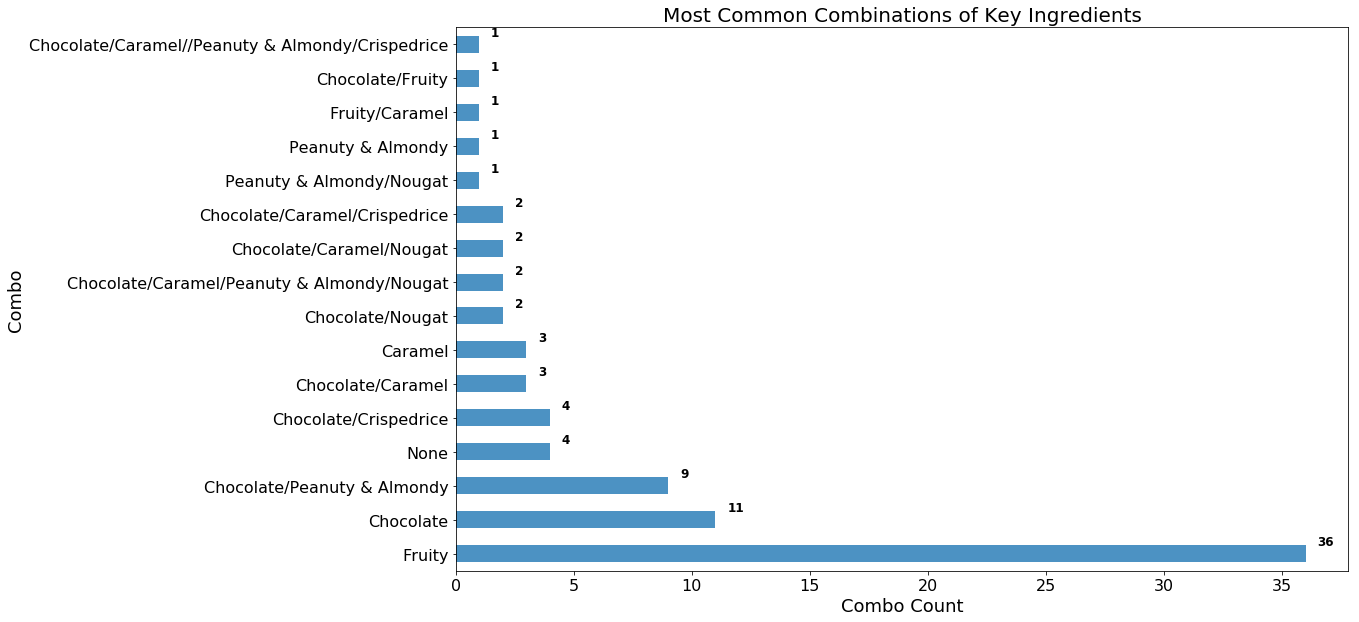

In [31]:
df_grouped2 = df.groupby('combo')['competitorname'].count().sort_values(ascending = False)
df_grouped2.plot(kind = 'barh', fontsize = 16, alpha = 0.8, figsize = (16,10))
for i, v in enumerate(df_grouped2):
    plt.text(v + 0.50, i + .25, str(v), color='black', fontweight='bold', size = 12)
plt.xlabel('Combo Count', size = 18)
plt.ylabel('Combo', size = 18)
plt.title('Most Common Combinations of Key Ingredients', fontsize = 20)
plt.show()

### Most Popular Candy by Candy Combo ###

In [32]:
df.sort_values('winpercent', ascending = False).groupby('combo', as_index = False).first()

,combo,competitorname,popularity_rank,price_rank,sugar_rank,form,number_ingredients,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
0,Caramel,Werther's Original Caramel,57.0,62.0,70.0,Hard,1,18.600000,26.699999,41.904308,0,0,1,0,0,0,1,0,0,0
1,Chocolate,M&M's,15.0,26.0,14.5,Bagged,1,82.499999,65.100002,66.574585,1,0,0,0,0,0,0,0,1,0
2,Chocolate/Caramel,Rolo,17.0,10.5,12.0,Bagged,2,86.000001,86.000001,65.716286,1,0,1,0,0,0,0,0,1,0
3,Chocolate/Caramel//Peanuty & Almondy/Crispedrice,Snickers Crisper,23.0,26.0,29.5,Bar,4,60.399997,65.100002,59.529251,1,0,1,1,0,1,0,1,0,0
4,Chocolate/Caramel/Crispedrice,Twix,3.0,8.0,38.5,Bar,3,54.600000,90.600002,81.642914,1,0,1,0,0,1,0,1,0,0
5,Chocolate/Caramel/Nougat,Milky Way,7.0,26.0,29.5,Bar,3,60.399997,65.100002,73.099556,1,0,1,0,1,0,0,1,0,0
6,Chocolate/Caramel/Peanuty & Almondy/Nougat,Snickers,5.0,26.0,38.5,Bar,4,54.600000,65.100002,76.673782,1,0,1,1,1,0,0,1,0,0
7,Chocolate/Crispedrice,Kit Kat,4.0,36.0,55.5,Bar,2,31.299999,51.099998,76.768600,1,0,0,0,0,1,0,1,0,0
8,Chocolate/Fruity,Tootsie Pop,42.0,52.5,29.5,Hard,2,60.399997,32.499999,48.982651,1,1,0,0,0,0,1,0,0,0
9,Chocolate/Nougat,3 Musketeers,12.0,36.0,29.5,Bar,2,60.399997,51.099998,67.602936,1,0,0,0,1,0,0,1,0,0


In [33]:
df.groupby('combo')['winpercent','sugarpercent', 'pricepercent'].mean().sort_values('winpercent', ascending = False)

,winpercent,sugarpercent,pricepercent
combo,,,
Chocolate/Caramel/Crispedrice,74.307320,63.900000,88.300002
Chocolate/Peanuty & Almondy,69.880879,54.977777,66.511113
Chocolate/Caramel/Nougat,66.950129,66.799998,54.600002
Chocolate/Caramel/Peanuty & Almondy/Nougat,66.794164,57.499999,70.900002
Chocolate/Crispedrice,63.761969,48.199999,76.099999
Chocolate/Caramel,61.711233,70.899999,74.366667
Chocolate/Caramel//Peanuty & Almondy/Crispedrice,59.529251,60.399997,65.100002
Chocolate/Nougat,53.288987,60.399997,51.099998
Chocolate,50.344909,34.190909,53.227272


When I think about candy, I think about chooclate. In fact, for Halloween I bought Kit Kats and Milky Ways. Thirty-seven out of the eighty-three candies (44%) have chocolate in it. What candies do not have chocolate?

In [34]:
# Most popular candies that don't have chocolate
df[df['chocolate'] != 1].sort_values('winpercent', ascending = False)

,competitorname,popularity_rank,price_rank,sugar_rank,form,combo,number_ingredients,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
68,Starburst,13.0,65.0,73.0,Bagged,Fruity,1,15.099999,22.000000,67.037628,0,1,0,0,0,0,0,0,1,0
60,Skittles original,19.0,65.0,4.5,Bagged,Fruity,1,94.099998,22.000000,63.085140,0,1,0,0,0,0,0,0,1,0
66,Sour Patch Kids,22.0,70.5,79.5,Bagged,Fruity,1,6.900000,11.600000,59.863998,0,1,0,0,0,0,0,0,1,0
18,Haribo Gold Bears,26.0,43.5,43.0,Bagged,Fruity,1,46.500000,46.500000,57.119740,0,1,0,0,0,0,0,0,1,0
41,Nerds,30.0,52.5,13.0,Hard/Bagged,Fruity,1,84.799999,32.499999,55.354046,0,1,0,0,0,0,1,0,1,0
61,Skittles wildberry,31.0,65.0,4.5,Bagged,Fruity,1,94.099998,22.000000,55.103695,0,1,0,0,0,0,0,0,1,0
73,Swedish Fish,33.0,21.0,29.5,Bagged,Fruity,1,60.399997,75.500000,54.861111,0,1,0,0,0,0,0,0,1,0
31,Lifesavers big ring gummies,35.0,60.0,62.0,Other,Fruity,1,26.699999,27.900001,52.911392,0,1,0,0,0,0,0,0,0,1
67,Sour Patch Tricksters,36.0,70.5,79.5,Bagged,Fruity,1,6.900000,11.600000,52.825947,0,1,0,0,0,0,0,0,1,0
4,Air Heads,37.0,36.0,7.0,Other,Fruity,1,90.600002,51.099998,52.341465,0,1,0,0,0,0,0,0,0,1


As shown above, the candies in this study that do not have chocolate often have fruity as the key ingredient. 

In [35]:
# The most popular non-chocolate candies contain Fruit= Starbursts, Skittles, Nerds
df_fruity = df[df['combo'] == 'Fruity']
fruity_combo = pd.crosstab(df_fruity.combo, df.form)
fruity_combo

form,Bagged,Hard,Hard/Bagged,Other
combo,,,,
Fruity,19,5,7,5


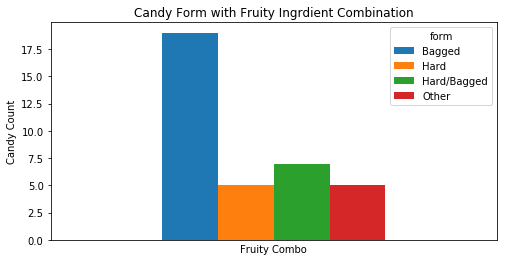

In [36]:
# Graphs of this
fruity_combo.plot(kind = 'bar', title = 'Candy Form with Fruity Ingrdient Combination', figsize = (8,4))
plt.xlabel('Fruity Combo', size = 10)
plt.xticks([], [])
plt.ylabel('Candy Count', size = 10)
plt.show();

Fruity is rarely in combiantion with other key ingredients. Here, caramel and fruity were together for Caramel Apple Pops and chocolate and fruity are together in only one candy, which is Tootsie Pop. There are a lot of candies with a 'fruity' key ingredients, but they tend to be less popular with a few exceptions, such as Starburst and SKittles. 

## Candy Form Analysis##

Candy form comes in either bagged, bar, hard, hard/bagged, or other forms. 

In [37]:
df.groupby('form')[['competitorname']].count()

,competitorname
form,
Bagged,36
Bar,21
Hard,7
Hard/Bagged,8
Other,11


In [38]:
# What candy has other form?
df[df['form'] == 'Other'].sort_values('popularity_rank')

,competitorname,popularity_rank,price_rank,sugar_rank,form,combo,number_ingredients,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
52,Reese's Peanut Butter cup,1.0,26.0,24.0,Other,Chocolate/Peanuty & Almondy,2,72.000003,65.100002,84.180290,1,0,0,1,0,0,0,0,0,1
51,Reese's Miniatures,2.0,60.0,83.0,Other,Chocolate/Peanuty & Almondy,2,3.400000,27.900001,81.866257,1,0,0,1,0,0,0,0,0,1
54,Reese's stuffed with pieces,8.0,26.0,1.0,Other,Chocolate/Peanuty & Almondy,2,98.799998,65.100002,72.887901,1,0,0,1,0,0,0,0,0,1
31,Lifesavers big ring gummies,35.0,60.0,62.0,Other,Fruity,1,26.699999,27.900001,52.911392,0,1,0,0,0,0,0,0,0,1
4,Air Heads,37.0,36.0,7.0,Other,Fruity,1,90.600002,51.099998,52.341465,0,1,0,0,0,0,0,0,0,1
80,Twizzlers,50.0,70.5,65.5,Other,Fruity,1,22.000000,11.600000,45.466282,0,1,0,0,0,0,0,0,0,1
75,Tootsie Roll Juniors,53.0,36.0,55.5,Other,Chocolate,1,31.299999,51.099998,43.068897,1,0,0,0,0,0,0,0,0,1
29,Laffy Taffy,58.0,70.5,65.5,Other,Fruity,1,22.000000,11.600000,41.389557,0,1,0,0,0,0,0,0,0,1
9,Caramel Apple Pops,74.0,52.5,29.5,Other,Fruity/Caramel,2,60.399997,32.499999,34.517681,0,1,1,0,0,0,0,0,0,1
71,Sugar Daddy,77.0,52.5,50.0,Other,Caramel,1,41.800001,32.499999,32.230995,0,0,1,0,0,0,0,0,0,1


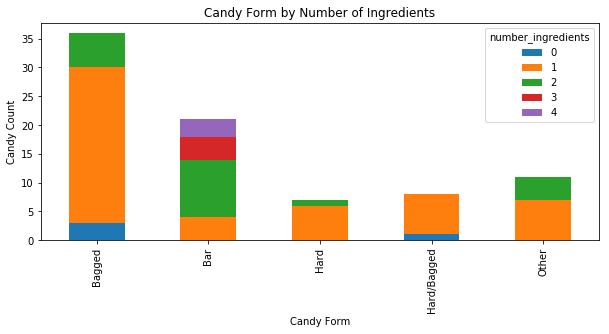

In [39]:
df_cross = pd.crosstab(df.form, df.number_ingredients)
df_cross.plot(kind = 'bar', title = 'Candy Form by Number of Ingredients', figsize = (10,4), stacked = True)
plt.xlabel('Candy Form', size = 10)
plt.ylabel('Candy Count', size = 10)
plt.show()

After looking at what candies have an 'Other' form, it looks like they are candies that are individually packaged in a non-bar form, such as Reese's. 

In [40]:
df_other = df[df['form'] == 'Other']
cross_other = pd.crosstab(df_other.form, df_other.combo)
cross_other

combo,Caramel,Chocolate,Chocolate/Peanuty & Almondy,Fruity,Fruity/Caramel
form,,,,,
Other,1,1,3,5,1


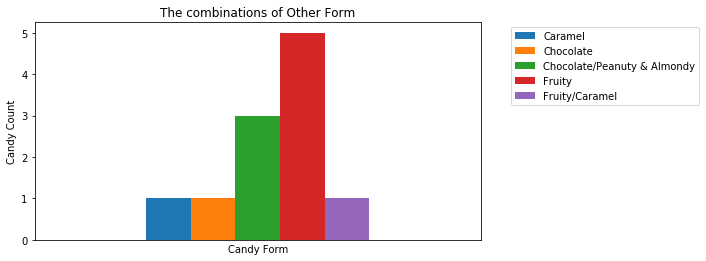

In [41]:
cross_other.plot(kind = 'bar', title = 'The combinations of Other Form', figsize = (8,4))
plt.xlabel('Candy Form', size = 10)
plt.xticks([], [])
plt.ylabel('Candy Count', size = 10)
plt.legend(loc=1, bbox_to_anchor=(1.50, 1))
plt.show();

Another way to view this data is below.

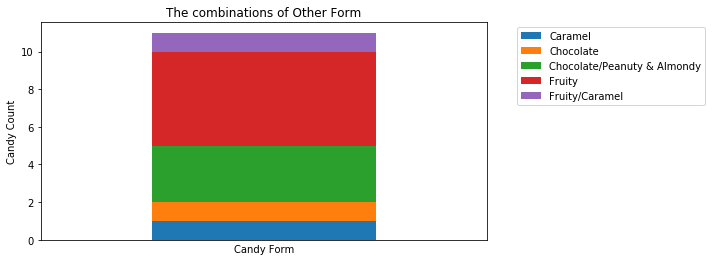

In [42]:
# Work on
cross_other.plot(kind = 'bar', title = 'The combinations of Other Form', figsize = (8,4), stacked = True)
plt.xlabel('Candy Form', size = 10)
plt.xticks([], [])
plt.ylabel('Candy Count', size = 10)
plt.legend(loc=1, bbox_to_anchor=(1.50, 1))
plt.show()

### Most Popular Candy by its Form ###

In [43]:
df.sort_values('winpercent', ascending = False).groupby('form', as_index = False).first()

,form,competitorname,popularity_rank,price_rank,sugar_rank,combo,number_ingredients,sugarpercent,pricepercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,other
0,Bagged,Reese's pieces,6.0,26.0,51.0,Chocolate/Peanuty & Almondy,2,40.599999,65.100002,73.434990,1,0,0,1,0,0,0,0,1,0
1,Bar,Twix,3.0,8.0,38.5,Chocolate/Caramel/Crispedrice,3,54.600000,90.600002,81.642914,1,0,1,0,0,1,0,1,0,0
2,Hard,Tootsie Pop,42.0,52.5,29.5,Chocolate/Fruity,2,60.399997,32.499999,48.982651,1,1,0,0,0,0,1,0,0,0
3,Hard/Bagged,Nerds,30.0,52.5,13.0,Fruity,1,84.799999,32.499999,55.354046,0,1,0,0,0,0,1,0,1,0
4,Other,Reese's Peanut Butter cup,1.0,26.0,24.0,Chocolate/Peanuty & Almondy,2,72.000003,65.100002,84.180290,1,0,0,1,0,0,0,0,0,1


## Statistical Analysis ##

I will look at correlations between the sugarpercent, winpercent, and pricepercent, number of key ingredients, candy form, and the specific key ingredients. 

### Analysis between Sugarpercent, Winpercent, and Pricepecent ###

Are there any correlations between sugarpercent, winpercent, and pricepercent? 

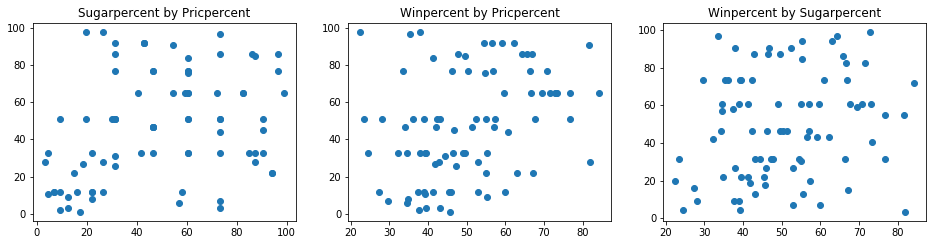

In [44]:
# Scatter with sugarpercent and winpercent
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(231)
plt.title('Sugarpercent by Pricpercent')
plt.scatter(df.sugarpercent, df.pricepercent)
ax2 = fig.add_subplot(232)
plt.title('Winpercent by Pricpercent')
plt.scatter(df.winpercent, df.pricepercent);
ax3 = fig.add_subplot(233)
plt.title('Winpercent by Sugarpercent')
plt.scatter(df.winpercent, df.sugarpercent);

In [45]:
# the correlations between sugarpercent, winpercent, and pricpercent?
print('Correlataion between sugarpercent and pricepercent: ' + str(pearsonr(df['sugarpercent'], df['pricepercent'])))
print('Correlataion between winpercent and pricepercent: ' + str(pearsonr(df['winpercent'], df['pricepercent'])))
print('Correlataion between sugarpercent and winpercent: ' + str(pearsonr(df['sugarpercent'], df['winpercent'])))

Correlataion between sugarpercent and pricepercent: (0.32158682066666106, 0.0030313572990568046)
Correlataion between winpercent and pricepercent: (0.33386111441964272, 0.0020388841966522283)
Correlataion between sugarpercent and winpercent: (0.20763497996748556, 0.059627261087103929)


*Conclusion*: The correlations between 'sugarpercent' and 'winpercent' in addition to 'winpercent' and 'pricepercen' are statistically signficiant, but they have weak correlations of 0.32 and 0.33. The correlation between 'sugarpercent' and 'winpercent' is not statistically significant.

### Number of Key Ingredients Analysis###

Does the number of key ingredients have an association with the popularity of a candy, how much sugar it has, and the price of the candy?

In [46]:
df.corr()[['number_ingredients']]

,number_ingredients
popularity_rank,-0.593136
price_rank,-0.461728
sugar_rank,-0.204193
number_ingredients,1.000000
sugarpercent,0.191233
pricepercent,0.454549
winpercent,0.601148
chocolate,0.625950
fruity,-0.406456
caramel,0.608501


In [47]:
print('Correlataion between number_ingredients and pricepercent: ' + str(pearsonr(df['number_ingredients'], df['pricepercent'])))
print('Correlataion between number_ingredients and winpercent: ' + str(pearsonr(df['number_ingredients'], df['winpercent'])))
print('Correlataion between number_ingredients and chocolate: ' + str(pearsonr(df['number_ingredients'], df['chocolate'])))
print('Correlataion between number_ingredients and caramel: ' + str(pearsonr(df['number_ingredients'], df['caramel'])))
print('Correlataion between number_ingredients and peanutyalmondy: ' + str(pearsonr(df['number_ingredients'], df['peanutyalmondy'])))
print('Correlataion between number_ingredients and nougat: ' + str(pearsonr(df['number_ingredients'], df['nougat'])))
print('Correlataion between number_ingredients and bar: ' + str(pearsonr(df['number_ingredients'], df['bar'])))
print('Correlataion between number_ingredients and pluribus: ' + str(pearsonr(df['number_ingredients'], df['pluribus'])))

Correlataion between number_ingredients and pricepercent: (0.45454867974717145, 1.5837104508199215e-05)
Correlataion between number_ingredients and winpercent: (0.60114785594895404, 1.8660443444745518e-09)
Correlataion between number_ingredients and chocolate: (0.62595037093830808, 2.4860751889038358e-10)
Correlataion between number_ingredients and caramel: (0.60850146415509254, 1.0453025801694494e-09)
Correlataion between number_ingredients and peanutyalmondy: (0.52877672615213644, 2.7676677680801846e-07)
Correlataion between number_ingredients and nougat: (0.54426919634534987, 1.0467673615307558e-07)
Correlataion between number_ingredients and bar: (0.63169453664652597, 1.5191305655595192e-10)
Correlataion between number_ingredients and pluribus: (-0.4792549145647555, 4.5684299965652345e-06)


*Conclusion:* There are strong positive assocations between the number of ingredients and winpercent, chocolate, caramel, and bar. There are moderate positive associations between the number of ingredients and peanutyalmondyand nougat. There is a moderate negative association between number of ingrdients and pluribus (bag form). These associations are statistically significant.

This suggests that candies with more key ingredients will be associated with being in a bar form or have its ingredients be chocolate, caramel, peanutyalmody, or nougat. More analysis needs to be done to determine if bar form has a relationship with any of the key ingredients.

### Candy Form Analysis ###

In [48]:
df.corr()[['bar', 'hard', 'pluribus', 'other']]

,bar,hard,pluribus,other
popularity_rank,-0.441878,0.333261,0.245853,0.019281
price_rank,-0.519458,0.264919,0.249747,0.146601
sugar_rank,-0.106080,-0.076626,0.016158,0.078783
number_ingredients,0.631695,-0.238366,-0.479255,-0.022277
sugarpercent,0.080044,0.076022,0.004191,-0.069440
pricepercent,0.517721,-0.253483,-0.239779,-0.164569
winpercent,0.425203,-0.322812,-0.272584,0.028434
chocolate,0.593165,-0.358230,-0.369810,-0.064598
fruity,-0.534810,0.385407,0.283713,0.068743
caramel,0.329919,-0.127943,-0.285049,0.013719


In [49]:
print('Correlataion between bar and chocolate: ' + str(pearsonr(df['bar'], df['chocolate'])))
print('Correlataion between bar and pricepercent: ' + str(pearsonr(df['bar'], df['pricepercent'])))
print('Correlataion between bar and nougat: ' + str(pearsonr(df['bar'], df['nougat'])))
print('Correlataion between bar and crispedricewafer: ' + str(pearsonr(df['bar'], df['crispedricewafer'])))
print('Correlataion between bar and fruit: ' + str(pearsonr(df['bar'], df['fruity'])))

Correlataion between bar and chocolate: (0.5931648855992534, 3.4436655350187518e-09)
Correlataion between bar and pricepercent: (0.51772123824623162, 5.3804636512749744e-07)
Correlataion between bar and nougat: (0.52146891044567889, 4.3062155053028856e-07)
Correlataion between bar and crispedricewafer: (0.42174098517611364, 7.1606247764698046e-05)
Correlataion between bar and fruit: (-0.53480978429376547, 1.9062755009409029e-07)


*Conclusion:* There are moderate positive assocations between bar and pricepercent, chocolate, and nougat. 
There is a moderate negative association between bar and fruity. These associations are statistically significant.

This suggests that candies that are in bar form are associated with  having ingrdients chocolate and nougat and are assocaited with not having a fruity ingredient in it. 

### Key Ingrdient Analysis ###

In [50]:
df.corr()[["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer"]]['chocolate':'crispedricewafer']

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer
chocolate,1.000000,-0.775500,0.243325,0.372786,0.251167,0.338392
fruity,-0.775500,1.000000,-0.349349,-0.413928,-0.278887,-0.278887
caramel,0.243325,-0.349349,1.000000,0.054865,0.326416,0.210636
peanutyalmondy,0.372786,-0.413928,0.054865,1.000000,0.210636,-0.020924
nougat,0.251167,-0.278887,0.326416,0.210636,1.000000,-0.092105
crispedricewafer,0.338392,-0.278887,0.210636,-0.020924,-0.092105,1.000000


In [51]:
print('Correlataion between chocolate and fruity: ' + str(pearsonr(df['chocolate'], df['fruity'])))
print('Correlataion between chocolate and caramel: ' + str(pearsonr(df['chocolate'], df['caramel'])))
print('Correlataion between chocolate and peanutyalmondy: ' + str(pearsonr(df['chocolate'], df['peanutyalmondy'])))
print('Correlataion between chocolate and nougat: ' + str(pearsonr(df['chocolate'], df['nougat'])))
print('Correlataion between chocolate and crispedricewafer: ' + str(pearsonr(df['chocolate'], df['crispedricewafer'])))
print('Correlataion between fruity and peanutyalmondy: ' + str(pearsonr(df['fruity'], df['peanutyalmondy'])))
print('Correlataion between fruity and caramel: ' + str(pearsonr(df['fruity'], df['caramel'])))
print('Correlataion between fruity and peanutyalmondy: ' + str(pearsonr(df['fruity'], df['peanutyalmondy'])))
print('Correlataion between fruity and nougat: ' + str(pearsonr(df['fruity'], df['nougat'])))
print('Correlataion between fruity and crispedricewafer: ' + str(pearsonr(df['fruity'], df['crispedricewafer'])))
print('Correlataion between caramel and peanutyalmondy: ' + str(pearsonr(df['caramel'], df['peanutyalmondy'])))
print('Correlataion between caramel and nougat: ' + str(pearsonr(df['caramel'], df['nougat'])))
print('Correlataion between caramel and crispedricewafer: ' + str(pearsonr(df['caramel'], df['crispedricewafer'])))
print('Correlataion between caramel and peanutyalmondy: ' + str(pearsonr(df['caramel'], df['peanutyalmondy'])))
print('Correlataion between peanutyalmondy and nougat: ' + str(pearsonr(df['peanutyalmondy'], df['nougat'])))

Correlataion between chocolate and fruity: (-0.77550037314392473, 7.5005982303405505e-18)
Correlataion between chocolate and caramel: (0.24332473156550291, 0.02665019960662586)
Correlataion between chocolate and peanutyalmondy: (0.37278596694971278, 0.00051903799902226397)
Correlataion between chocolate and nougat: (0.25116684305548398, 0.021999076402824714)
Correlataion between chocolate and crispedricewafer: (0.33839214838437587, 0.001753992937933665)
Correlataion between fruity and peanutyalmondy: (-0.41392819902158107, 0.00010030115888800932)
Correlataion between fruity and caramel: (-0.3493491754900187, 0.0012075419998739138)
Correlataion between fruity and peanutyalmondy: (-0.41392819902158107, 0.00010030115888800932)
Correlataion between fruity and nougat: (-0.27888667551135854, 0.010676350857046874)
Correlataion between fruity and crispedricewafer: (-0.27888667551135848, 0.010676350857046929)
Correlataion between caramel and peanutyalmondy: (0.054865424430641845, 0.622267957929

*Conclusion:* There is a strong negative association between chocolate and fruity and low positive associations between chocolate and caramel, peanutyalmondy, nougat, and crispedricewafer.

In addition, frutiy had low negative associations between caramel, peanutalmondy, nougat, and crispedricewafer.There is a low positive association between caramel and nougat. These associations are statistically significant.

Caramel's other associations with the other ingredients were not statistically significant. 

This suggests that candies that have chocolate as a key ingredient are associated with not having a fruity ingrdient in it. 

# Summary # 

Candy is great. The most popular kinds of candy are associated with having multiple key ingredients, with chocolate being one of them, and being in bar form. Candies with a fruity ingredient are likely to be less popular than other candies, despite there being more fruity candies. 

The statistical analysis suggests that candies having chocolate are associated with being more popular, or in other words, more likely to be selected when being offered with other candies. 


Lastly.....
           
           .......

  # HAPPY HALLOWEEN!!#